In [214]:
from adata.stock import Stock
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [215]:
from database import Database
from crawler import Crawler
from api_source import TiingoApiSource, AshareApiSource, FederalFinanceAPI, BureauOfLaborStatisticsAPI
from datetime import datetime
from backend import Backend
from cert import TiingoKey
from main import *

import matplotlib.pyplot as plt
from frontend import Frontend


# Api Source

In [216]:
tiingo_source = TiingoApiSource(TiingoKey)
ashare_source = AshareApiSource()
fed_source = FederalFinanceAPI()
bls_source = BureauOfLaborStatisticsAPI()

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')

In [165]:
data = tiingo_source.fetch_data('BRK-B', START_DATE, END_DATE)

📡 [Tiingo] Fetching data for BRK-B from 2000-01-01 to 2025-09-29...
✓ [Tiingo] Successfully fetched 6474 days of data


In [15]:
data = ashare_source.fetch_data('sh000001', START_DATE, END_DATE)

📡 [Sina] Fetching A-share data for sh000001 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2000-01-04 to 2025-09-26 (6239 days)
✓ [Sina] Successfully fetched 6239 trading days of data


In [220]:
data = fed_source.fetch_data('treasury_rates', START_DATE, END_DATE)

📡 [Treasury] Fetching Average Interest Rates on U.S. Treasury Securities from 2000-01-01 to 2025-09-29...
✓ [Treasury] Successfully fetched 4810 records


In [218]:
data = bls_source.fetch_data('cpi_inflation', START_DATE, END_DATE)

📡 [BLS] Fetching Consumer Price Index (CPI) - Inflation Data from 2000 to 2025...
✓ [BLS] Successfully fetched 120 records


In [223]:
data.index.unique()

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30', '2025-05-31', '2025-06-30',
               '2025-07-31', '2025-08-31'],
              dtype='datetime64[ns]', name='date', length=296, freq=None)

# Crawler



In [166]:
crawler = Crawler(TiingoApiSource(TiingoKey, quota_limit=40))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['BRK-B']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with TiingoApiSource
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 1 symbols from 2000-01-01 to 2025-09-29
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (1 symbols)
[1/1] Processing BRK-B...
📂 Data loaded: 379556 rows
✓ Database initialized: 379556 rows from data/stock_data.pkl
📡 [Tiingo] Fetching data for BRK-B from 2000-01-01 to 2025-09-29...
✓ [Tiingo] Successfully fetched 6474 days of data
💾 Writing batch 1 (1 symbols) to database...
📊 Merged data: 379556 existing + 6474 new = 386030 total rows
💾 Database saved: 386030 rows to data/stock_data.pkl
✅ Successfully saved batch 1

📊 Final Crawl Summary:
✅ Total Successful: 1 symbols
   BRK-B


'data/stock_data.pkl'

In [44]:
crawler = Crawler(AshareApiSource(quota_limit=100))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['SH512170', 'SZ159766', 'SZ159855', 'SH588000', "SZ159869", 'SZ159936', 'SH510050', 'SH000001', 'SH000300']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with AshareApiSource
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 9 symbols from 2000-01-01 to 2025-09-27
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (9 symbols)
[1/9] Processing SH512170...
📂 Data loaded: 353917 rows
✓ Database initialized: 353917 rows from data/stock_data.pkl
📡 [Sina] Fetching A-share data for sh512170 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2019-06-17 to 2025-09-26 (1528 days)
✓ [Sina] Successfully fetched 1528 trading days of data
[2/9] Processing SZ159766...
📡 [Sina] Fetching A-share data for sz159766 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2021-07-23 to 2025-09-26 (1016 days)
✓ [Sina] Successfully fetched 1016 trading days of data
[3/9] Processing SZ159855...
📡 [Sina] Fetching A-share data for sz159855 from 2000-01-01 to 2025-09-27...
📊 [Sina] Retrieved data from 2021-02-26 to 2025-09-26 (1116 days)
✓ [Sina] Successfully fetched 1116 tradi

'data/stock_data.pkl'

In [224]:
crawler = Crawler(FederalFinanceAPI(quota_limit=100))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['treasury_rates', 'exchange_rates']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with FederalFinanceAPI
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 2 symbols from 2000-01-01 to 2025-09-29
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (2 symbols)
[1/2] Processing TREASURY_RATES...
📂 Data loaded: 386030 rows
✓ Database initialized: 386030 rows from data/stock_data.pkl
📡 [Treasury] Fetching Average Interest Rates on U.S. Treasury Securities from 2000-01-01 to 2025-09-29...
✓ [Treasury] Successfully fetched 4810 records
[2/2] Processing EXCHANGE_RATES...
📡 [Treasury] Fetching Treasury Reporting Rates of Exchange from 2000-01-01 to 2025-09-29...
✓ [Treasury] Successfully fetched 10000 records
💾 Writing batch 1 (2 symbols) to database...
📊 Merged data: 386030 existing + 14810 new = 400840 total rows
💾 Database saved: 400840 rows to data/stock_data.pkl
✅ Successfully saved batch 1

📊 Final Crawl Summary:
✅ Total Successful: 2 symbols
   TREASURY_RATES, EXCHANGE_RATES


'data/stock_data.pkl'

In [225]:
crawler = Crawler(BureauOfLaborStatisticsAPI(quota_limit=100))

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['cpi_inflation', 'unemployment_rate']

crawler.crawl(symbols, START_DATE, END_DATE, force=False)

✓ Crawler initialized with BureauOfLaborStatisticsAPI
✓ Data will be stored in: data/stock_data.pkl
🚀 Starting batch crawl for 2 symbols from 2000-01-01 to 2025-09-29
📦 Using batch size of 10 symbols per database write

📦 Processing batch 1/1 (2 symbols)
[1/2] Processing CPI_INFLATION...
📂 Data loaded: 400840 rows
✓ Database initialized: 400840 rows from data/stock_data.pkl
📡 [BLS] Fetching Consumer Price Index (CPI) - Inflation Data from 2000 to 2025...
✓ [BLS] Successfully fetched 120 records
[2/2] Processing UNEMPLOYMENT_RATE...
📡 [BLS] Fetching Unemployment Rate from 2000 to 2025...
✓ [BLS] Successfully fetched 120 records
💾 Writing batch 1 (2 symbols) to database...
📊 Merged data: 400840 existing + 240 new = 401080 total rows
💾 Database saved: 401080 rows to data/stock_data.pkl
✅ Successfully saved batch 1

📊 Final Crawl Summary:
✅ Total Successful: 2 symbols
   CPI_INFLATION, UNEMPLOYMENT_RATE


'data/stock_data.pkl'

# Database

In [226]:
# Initialize database
db = Database("data/stock_data.pkl")

# Explore what's available
print(f"Symbols: {db.get_symbols()}")
print(f"Date range: {db.get_date_range()}")

# Database overview
db.info()

📂 Data loaded: 401080 rows
✓ Database initialized: 401080 rows from data/stock_data.pkl
Symbols: ['AAL', 'AAPL', 'ABNB', 'AFRM', 'ALB', 'ALK', 'ALTM', 'AMZN', 'ARKQ', 'ATVI', 'AXP', 'BABA', 'BAC', 'BBY', 'BETZ', 'BIDU', 'BILI', 'BLNK', 'BND', 'BNKU', 'BRK-B', 'BYDDF', 'C', 'CPI_INFLATION', 'CRM', 'CURE', 'DAL', 'DASH', 'DDOG', 'DIDIY', 'DOCU', 'EBAY', 'EMQQ', 'EXCHANGE_RATES', 'FTEC', 'GLD', 'GOOG', 'GOOGL', 'GS', 'HOOD', 'HUYA', 'IAU', 'IEF', 'INTU', 'IQ', 'JD', 'JETS', 'JOYY', 'JPM', 'JTKWY', 'KNDI', 'LAC', 'LI', 'LUV', 'LYFT', 'MA', 'MDB', 'META', 'MPNGF', 'MS', 'MSFT', 'NDAQ', 'NFLX', 'NIO', 'NIU', 'NKLAQ', 'NVDA', 'ORCL', 'PCRFY', 'PDD', 'PINS', 'PLTR', 'PYPL', 'QQQ', 'QS', 'SAVEQ', 'SH000001', 'SH000300', 'SH510050', 'SH512170', 'SH588000', 'SHOP', 'SHY', 'SMICY', 'SNAP', 'SNOW', 'SPY', 'SZ159766', 'SZ159855', 'SZ159869', 'SZ159936', 'TCEHY', 'TIGR', 'TLT', 'TMF', 'TREASURY_RATES', 'TSLA', 'TWTR', 'UAL', 'UBER', 'UNEMPLOYMENT_RATE', 'UPWK', 'V', 'VOO', 'VTI', 'VXUS', 'WFC', 'WORK

In [171]:
# db.backfill_all_split_adjusted_prices()
db.backfill_split_adjusted_prices('BRK-B')

Adjusting BRK-B for 1 splits on columns: ['Open', 'High', 'Low', 'Close', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close']
  Applied 50.0x split on 2010-01-21
  Cleaned up Split_Factor field - set all values to 1.0
💾 Database saved: 386030 rows to data/stock_data.pkl
✓ Split-adjusted prices saved for BRK-B


In [ ]:
db.backfill_sparse_prices('cpi_inflation')

In [228]:
db.query(symbol='cpi_inflation')

,Close,High,Low,Open,Volume,Adj_Close,Adj_High,Adj_Low,Adj_Open,Adj_Volume,...,record_calendar_quarter,record_calendar_month,record_calendar_day,country,currency,country_currency_desc,exchange_rate,effective_date,cpi_value,unemployment_rate
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,168.800,168.800,168.800,168.800,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.800,NaN
2000-02-01,169.800,169.800,169.800,169.800,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.800,NaN
2000-03-01,171.200,171.200,171.200,171.200,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.200,NaN
2000-04-01,171.300,171.300,171.300,171.300,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.300,NaN
2000-05-01,171.500,171.500,171.500,171.500,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-08-01,215.834,215.834,215.834,215.834,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.834,NaN
2009-09-01,215.969,215.969,215.969,215.969,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.969,NaN
2009-10-01,216.177,216.177,216.177,216.177,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.177,NaN


# Backend

In [47]:
backend = Backend(Database("data/stock_data.pkl"))

📂 Data loaded: 379556 rows
✓ Database initialized: 379556 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl


In [56]:
prices = backend.get_daily_price("SZ159855", '2021-02-01', '2025-09-01')
prices

📂 Retrieved 1097 days of data for SZ159855 from database


,Open,High,Low,Close,Volume,Split Factor,Adj Close,Adj Volume
date,,,,,,,,
2021-02-26,0.979,0.979,0.961,0.971,22271968,1.0,0.971,22271968
2021-03-01,0.985,0.989,0.971,0.987,22340774,1.0,0.987,22340774
2021-03-02,0.985,0.989,0.965,0.971,11035751,1.0,0.971,11035751
2021-03-03,0.978,0.990,0.969,0.989,10615526,1.0,0.989,10615526
2021-03-04,0.975,0.989,0.972,0.976,10074636,1.0,0.976,10074636
...,...,...,...,...,...,...,...,...
2025-08-26,0.999,1.014,0.992,1.010,17868403,1.0,1.010,17868403
2025-08-27,1.010,1.020,0.989,0.990,24385906,1.0,0.990,24385906
2025-08-28,0.989,1.006,0.967,0.999,21214301,1.0,0.999,21214301


In [55]:
backend.get_date_range_for_symbol("VTI")

{'start_date': '2001-05-31', 'end_date': '2025-09-26'}

# FrontEnd

⚠️  Style 'seaborn-v0_8' not available, using default
✓ Frontend initialized with style: seaborn-v0_8
📂 Data loaded: 337004 rows
✓ Database initialized: 337004 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl
📂 Retrieved 1423 days of data for SPY from database
📂 Retrieved 1423 days of data for AAPL from database
📂 Retrieved 1423 days of data for TSLA from database
📂 Retrieved 1423 days of data for GOOGL from database
📈 Plotting comparison chart for 4 symbols...

📊 Summary Statistics:
--------------------------------------------------
   SPY: Latest: $  645.05 | Min: $  222.95 | Max: $  648.92 | Avg: $  444.52
  AAPL: Latest: $  232.14 | Min: $   56.09 | Max: $  259.02 | Avg: $  161.39
  TSLA: Latest: $  333.87 | Min: $   24.08 | Max: $  479.86 | Avg: $  225.62
 GOOGL: Latest: $  212.91 | Min: $   52.71 | Max: $  212.91 | Avg: $  125.89
✓ Successfully created comparison chart for 4 symbols
💡 Hover over the lines to see detailed informati

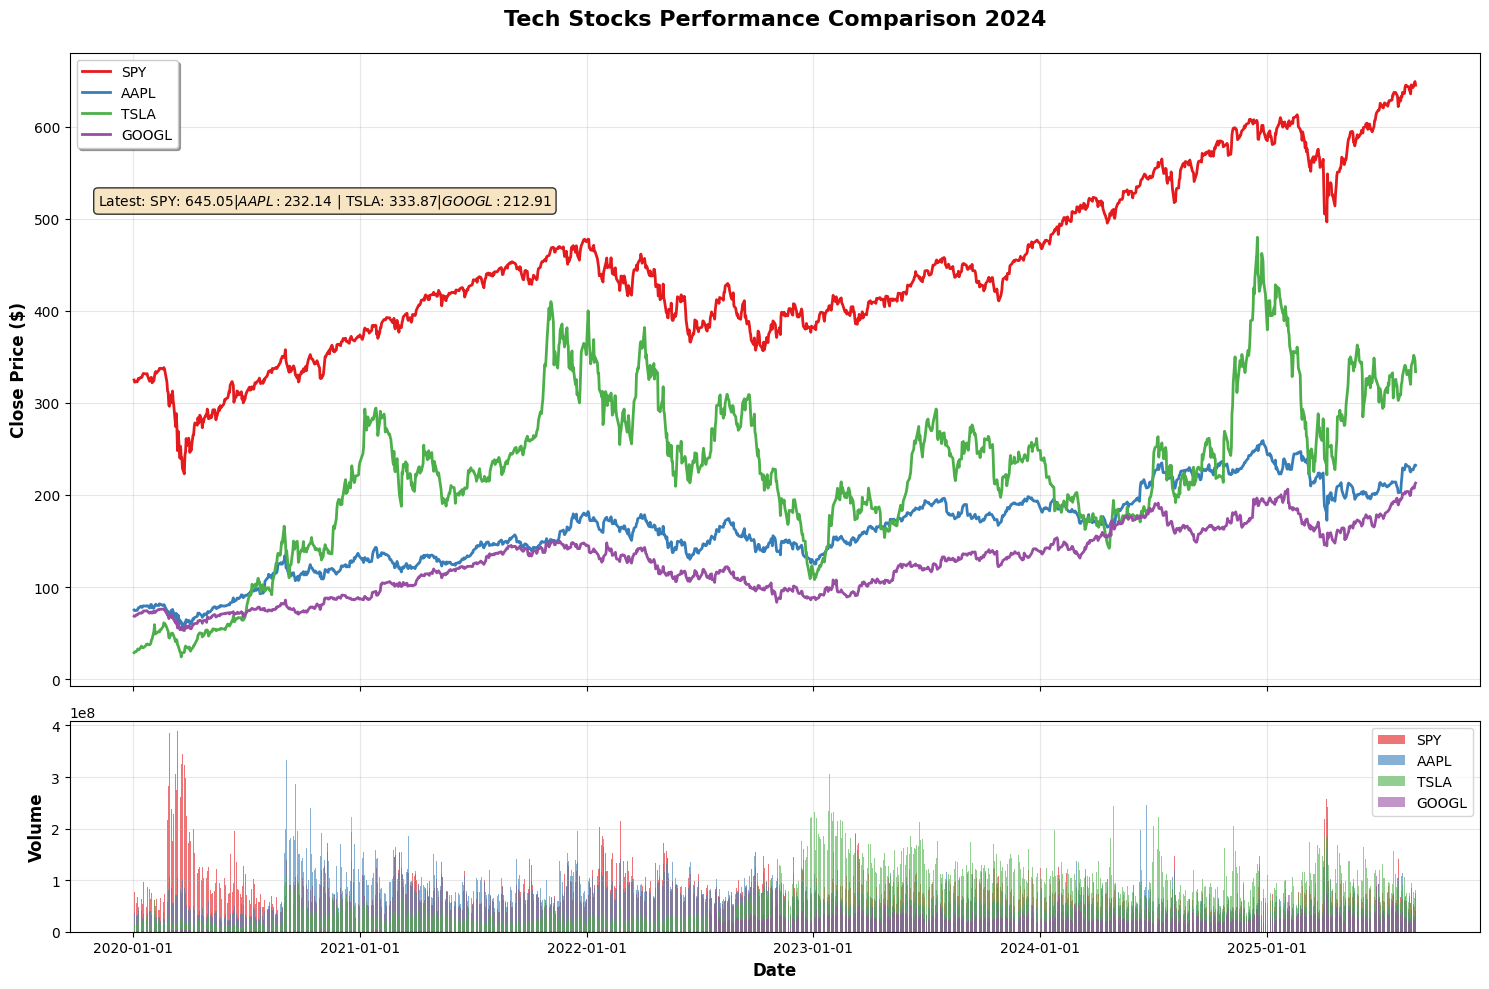

In [8]:

import matplotlib.pyplot as plt
from frontend import Frontend

# Initialize backend and frontend
frontend = Frontend()
backend = Backend(Database("data/stock_data.pkl"))

# Fetch data for multiple stocks
symbols = ['SPY', 'AAPL', 'TSLA', 'GOOGL']
dataframes = []

for symbol in symbols:
    df = backend.get_daily_price(symbol, '2020-01-01', '2025-09-01')
    dataframes.append(df)

# Create comparison plot
fig = frontend.plot_price_comparison(
    dataframes=dataframes,
    symbols=symbols,
    normalize=False,
    title='Tech Stocks Performance Comparison 2024'
)

plt.show()

# Main

In [81]:
# Chinese stock market

buy_recipe(
    1308252,
    0.05,
    {
        "SH510050": 0.75,
        "SH588000": 0.25,
    }
)

SH510050: buy 49059.450000000004
SH588000: buy 16353.150000000001


⚠️  Style 'seaborn-v0_8' not available, using default
✓ Frontend initialized with style: seaborn-v0_8
📂 Data loaded: 386030 rows
✓ Database initialized: 386030 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl
📂 Retrieved 4222 days of data for SPY from database
📂 Retrieved 4222 days of data for TLT from database
📈 Plotting comparison chart for 2 symbols...

📊 Summary Statistics:
--------------------------------------------------
   SPY: Latest: +654.7% | Min:  -20.3% | Max: +659.2% | Std: 167.1%
   TLT: Latest:   -9.4% | Min:  -13.4% | Max:  +79.5% | Std:  20.6%
✓ Successfully created comparison chart for 2 symbols
💡 Hover over the lines to see detailed information


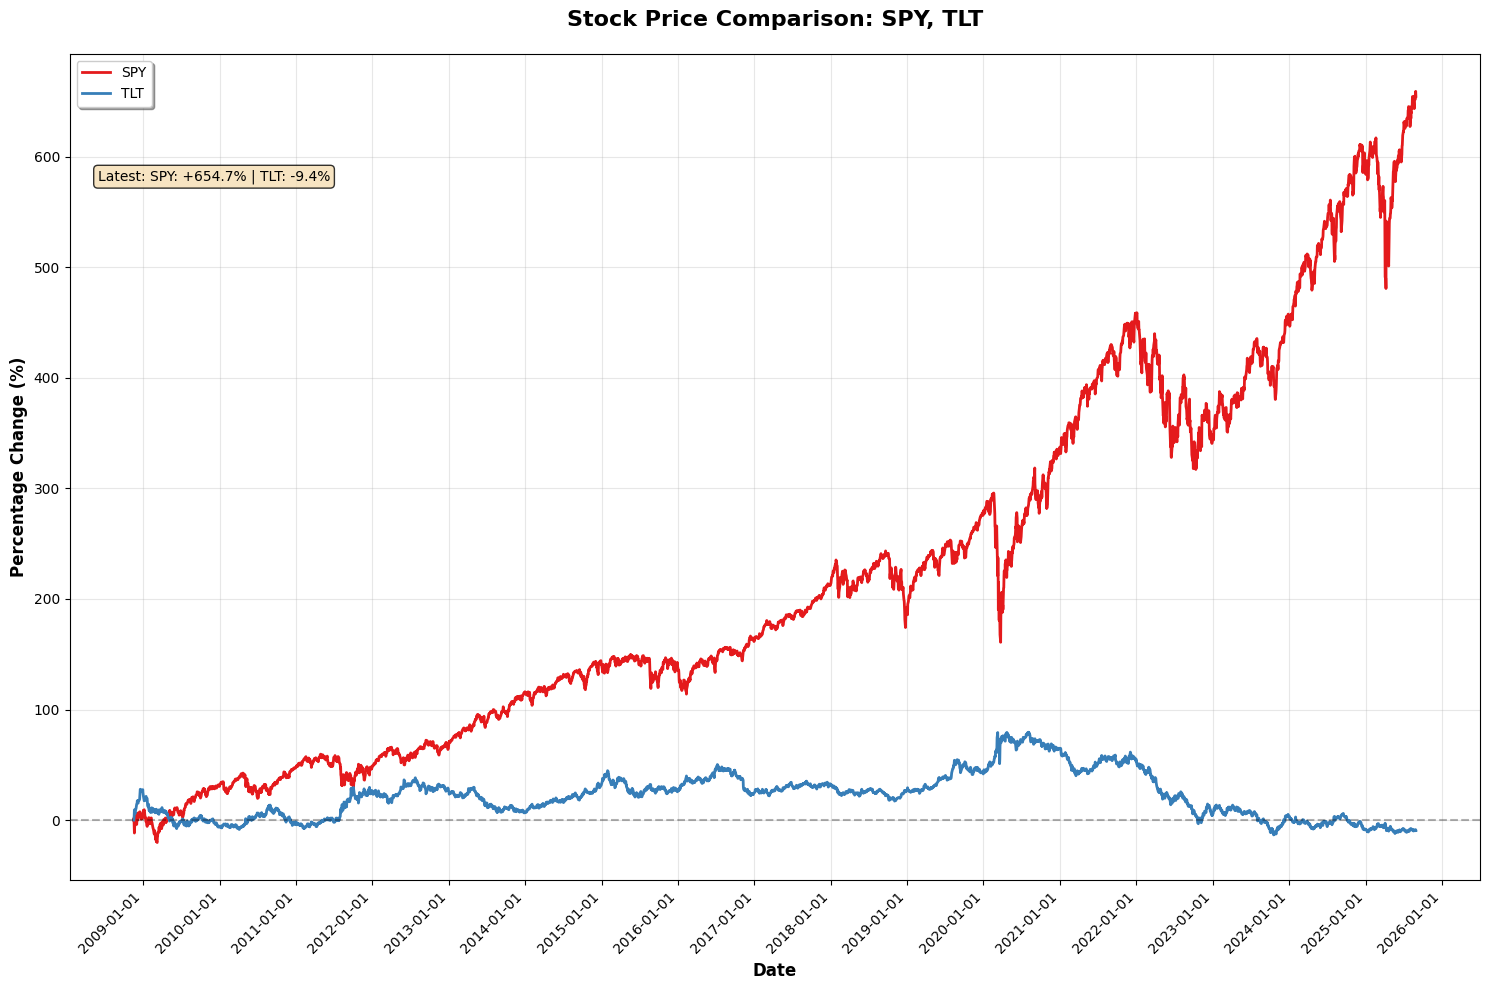

In [174]:
dfs = plot_prices(symbols=['SPY', 'TLT'], start_date='2008-11-17', end_date='2025-09-01', normalize=True)

⚠️  Style 'seaborn-v0_8' not available, using default
✓ Frontend initialized with style: seaborn-v0_8
📂 Data loaded: 386030 rows
✓ Database initialized: 386030 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl
📂 Retrieved 337 days of data for SPY from database
📂 Retrieved 337 days of data for TLT from database
📈 Plotting comparison chart for 3 symbols...

📊 Summary Statistics:
--------------------------------------------------
   spy: Latest: $    0.54 | Min: $    0.49 | Max: $    1.01 | Avg: $    0.81
   tlt: Latest: $    1.17 | Min: $    0.99 | Max: $    1.38 | Avg: $    1.08
[0.50% spy]+[0.50% tlt]: Latest: $    0.85 | Min: $    0.81 | Max: $    1.01 | Avg: $    0.94
✓ Successfully created comparison chart for 3 symbols
💡 Hover over the lines to see detailed information


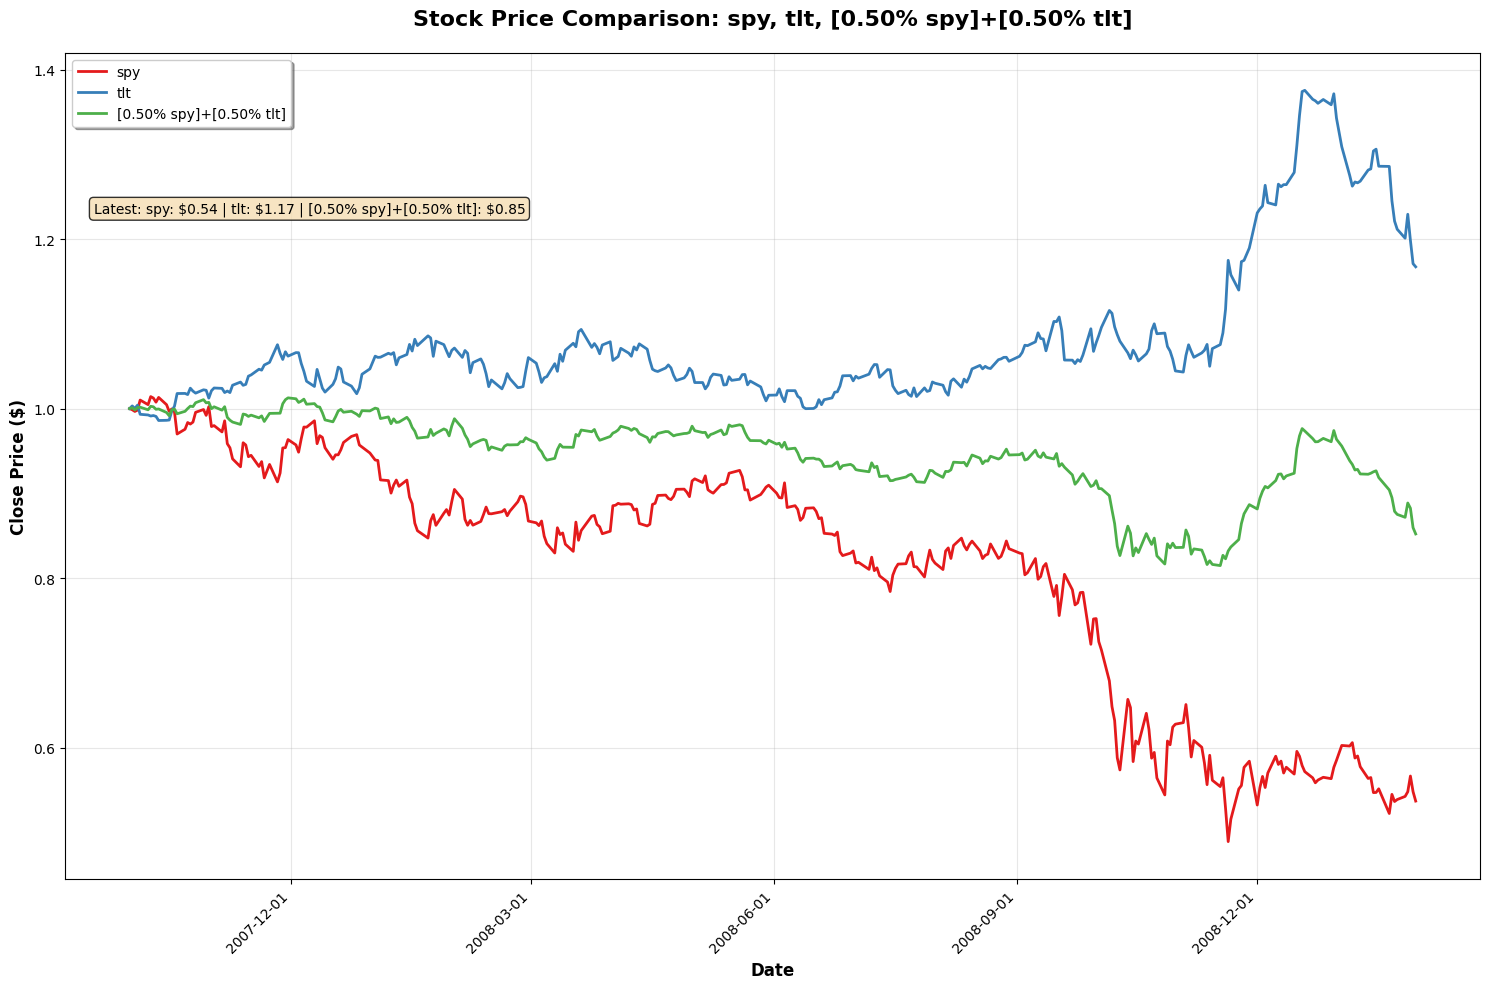

In [213]:
START_DATE='2007-10-01'
END_DATE='2009-02-01'
dfs = plot_prices_projected(symbols=['spy', 'tlt'], weights=[0.5, 0.5], start_date=START_DATE, end_date=END_DATE)

In [208]:
dfs